##                                                Goodcabs transportation Data Analysis

#### `trips_db`
------

**dim_city** \
**dim_date** \
**fact_passenger_summary** \
**dim_repeat_trip_distribution** \
**fact_trips** 

*Link to access datasets* : [ https://drive.google.com/drive/folders/1n1mfqoXIvuts0XGbaTn5FOjuMcRJ369T ]

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
root_path = r"D:\transportation goodcabs proj\RPC13_Input_For_Participants\datasets\csv_files\\"

city = pd.read_csv(root_path + "dim_city.csv")
date = pd.read_csv(root_path + "dim_date.csv")
passenger_summ = pd.read_csv(root_path + "fact_passenger_summary.csv")
repeat_trip_dist = pd.read_csv(root_path + "dim_repeat_trip_distribution.csv")
trips = pd.read_csv(root_path + "fact_trips.csv")

#### - **Checking for any null values**

In [203]:
trips.isnull().sum()

trip_id                   0
date                      0
city_id                   0
passenger_type            0
distance_travelled(km)    0
fare_amount               0
passenger_rating          0
driver_rating             0
dtype: int64

No null values in any of the table

In [204]:
trips.duplicated().sum()

np.int64(0)

no duplicates in trips df

#### Exploratory Data Analysis
---

In [205]:
trips.columns

Index(['trip_id', 'date', 'city_id', 'passenger_type',
       'distance_travelled(km)', 'fare_amount', 'passenger_rating',
       'driver_rating'],
      dtype='object')

In [206]:
f"{trips.shape[0]} (no of rows in trips df)"

'425903 (no of rows in trips df)'

#### *Primary questions*

#### *Q1*

In [207]:
trip_count_by_city = trips.groupby("city_id")[["trip_id"]].count().merge(city,on = "city_id",how = "inner")[["city_id","city_name",\
                                                                                        "trip_id"]]\
                                                                        .sort_values("trip_id",ascending = False)\
                                                                .rename(columns = {"trip_id":"total_trips"})

In [208]:
trip_count_by_city

,city_id,city_name,total_trips
7,RJ01,Jaipur,76888
9,UP01,Lucknow,64299
2,GJ01,Surat,54843
5,KL01,Kochi,50702
6,MP01,Indore,42456
1,CH01,Chandigarh,38981
3,GJ02,Vadodara,32026
0,AP01,Visakhapatnam,28366
8,TN01,Coimbatore,21104
4,KA01,Mysore,16238


In [209]:
print(f"""
Top three cities by total trips :\n 
      {trip_count_by_city.head(3)}\n
Bottom three cities by total trips :\n
      {trip_count_by_city.tail(3)}""")


Top three cities by total trips :
 
        city_id city_name  total_trips
7    RJ01    Jaipur        76888
9    UP01   Lucknow        64299
2    GJ01     Surat        54843

Bottom three cities by total trips :

        city_id      city_name  total_trips
0    AP01  Visakhapatnam        28366
8    TN01     Coimbatore        21104
4    KA01         Mysore        16238


#### *Q2*

In [210]:
print("Average distance per trip by city\n")
trips.groupby("city_id").apply(lambda group : group[["distance_travelled(km)"]]["distance_travelled(km)"].sum()/\
                                              group[["trip_id"]]["trip_id"].count()).sort_values()

Average distance per trip by city



C:\Users\ADARSH\AppData\Local\Temp\ipykernel_13436\1950879092.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trips.groupby("city_id").apply(lambda group : group[["distance_travelled(km)"]]["distance_travelled(km)"].sum()/\


city_id
GJ01    10.997247
GJ02    11.517736
UP01    12.512963
TN01    14.979198
KA01    16.496921
MP01    16.502473
AP01    22.553938
CH01    23.518714
KL01    24.065461
RJ01    30.023125
dtype: float64

In [211]:
print("Average fare per Trip by city\n")
trips.groupby("city_id").apply(lambda group : group[["fare_amount"]]["fare_amount"].sum() /\
                               group[["trip_id"]]["trip_id"].count()).sort_values()

Average fare per Trip by city



C:\Users\ADARSH\AppData\Local\Temp\ipykernel_13436\1793720662.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trips.groupby("city_id").apply(lambda group : group[["fare_amount"]]["fare_amount"].sum() /\


city_id
GJ01    117.272925
GJ02    118.566165
UP01    147.180376
TN01    166.982183
MP01    179.838609
KA01    249.707168
AP01    282.672284
CH01    283.686950
KL01    335.245079
RJ01    483.918128
dtype: float64

In [212]:
avg_far_per_trip = trips.groupby("city_id").apply(lambda group : group[["fare_amount"]]["fare_amount"].sum() /\
                               group[["trip_id"]]["trip_id"].count(),include_groups=False).sort_values()

In [213]:
print(f"""
Average fare per Trip
Highest :
{avg_far_per_trip.reset_index().tail(1).iloc[0]}\n
Lowest :
{avg_far_per_trip.reset_index().head(1).iloc[0]}""")


Average fare per Trip
Highest :
city_id          RJ01
0          483.918128
Name: 9, dtype: object

Lowest :
city_id          GJ01
0          117.272925
Name: 0, dtype: object


#### *Q3*

In [214]:
trips.groupby(["city_id","passenger_type"]).agg({"passenger_rating" : "mean","driver_rating":"mean"})\
                                                .sort_values(["passenger_rating","driver_rating"]\
                                                             ,ascending = [False,False])

,,passenger_rating,driver_rating
city_id,passenger_type,,
KL01,new,8.987394,8.985350
RJ01,new,8.985018,8.988246
KA01,new,8.982964,8.982878
AP01,new,8.976151,8.979995
CH01,new,8.489158,7.992120
MP01,new,8.485837,7.970800
TN01,new,8.485788,7.990604
KL01,repeated,8.003665,8.989830
RJ01,repeated,7.991042,8.984790


#### *Q4*

In [215]:
trips.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [216]:
date.head(2)

,date,start_of_month,month_name,day_type
0,2024-01-01,2024-01-01,January,Weekday
1,2024-01-02,2024-01-01,January,Weekday


In [217]:
trip_dates = pd.merge(trips,date,how = "left",on = "date")[["trip_id","city_id","month_name","day_type"]]

In [218]:
trip_dates.head()

,trip_id,city_id,month_name,day_type
0,TRPLUC240113d55de2fb,UP01,January,Weekend
1,TRPVAD240129a3b6dba8,GJ02,January,Weekday
2,TRPCOI240107a42430fb,TN01,January,Weekend
3,TRPKOC240325d7601389,KL01,March,Weekday
4,TRPVIS2406027be97166,AP01,June,Weekend


In [219]:
total_trips_per_month = trip_dates.groupby(["city_id","month_name"])["trip_id"].count().reset_index()\
                .rename(columns = {"trip_id" : "no_of_trips"})
total_trips_per_month                

,city_id,month_name,no_of_trips
0,AP01,April,4938
1,AP01,February,4793
2,AP01,January,4468
3,AP01,June,4478
4,AP01,March,4877
5,AP01,May,4812
6,CH01,April,5566
7,CH01,February,7387
8,CH01,January,6810
9,CH01,June,6029


In [220]:
total_trips_per_month["min_no_trips"] = total_trips_per_month.groupby("city_id")["no_of_trips"].transform("min")
total_trips_per_month["max_no_trips"] = total_trips_per_month.groupby("city_id")["no_of_trips"].transform("max")
total_trips_per_month

,city_id,month_name,no_of_trips,min_no_trips,max_no_trips
0,AP01,April,4938,4468,4938
1,AP01,February,4793,4468,4938
2,AP01,January,4468,4468,4938
3,AP01,June,4478,4468,4938
4,AP01,March,4877,4468,4938
5,AP01,May,4812,4468,4938
6,CH01,April,5566,5566,7387
7,CH01,February,7387,5566,7387
8,CH01,January,6810,5566,7387
9,CH01,June,6029,5566,7387


In [221]:
total_trips_per_month[(total_trips_per_month["no_of_trips"] == total_trips_per_month["min_no_trips"]) |\
(total_trips_per_month["no_of_trips"] == total_trips_per_month["max_no_trips"])][["city_id","month_name",\
                                                                "no_of_trips"]].\
                        sort_values(["city_id","no_of_trips"],ascending = [True,False])

,city_id,month_name,no_of_trips
0,AP01,April,4938
2,AP01,January,4468
7,CH01,February,7387
6,CH01,April,5566
12,GJ01,April,9831
14,GJ01,January,8358
18,GJ02,April,5941
21,GJ02,June,4685
29,KA01,May,3007
26,KA01,January,2485


#### *Q5*

In [222]:
trip_dates.head(3)

,trip_id,city_id,month_name,day_type
0,TRPLUC240113d55de2fb,UP01,January,Weekend
1,TRPVAD240129a3b6dba8,GJ02,January,Weekday
2,TRPCOI240107a42430fb,TN01,January,Weekend


In [223]:
pd.crosstab(trip_dates["city_id"],trip_dates["day_type"],normalize="index")

day_type,Weekday,Weekend
city_id,,
AP01,0.532327,0.467673
CH01,0.510864,0.489136
GJ01,0.689113,0.310887
GJ02,0.634172,0.365828
KA01,0.395615,0.604385
KL01,0.451955,0.548045
MP01,0.499293,0.500707
RJ01,0.422576,0.577424
TN01,0.595906,0.404094


#### *Q6*

In [224]:
repeat_trip_dist.head(10)

,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158
3,2024-01-01,AP01,4-Trips,53
4,2024-01-01,AP01,5-Trips,38
5,2024-01-01,AP01,6-Trips,14
6,2024-01-01,AP01,7-Trips,10
7,2024-01-01,AP01,8-Trips,11
8,2024-01-01,AP01,9-Trips,7
9,2024-01-01,CH01,10-Trips,14


In [225]:
repeat_trip_dist["trip_count"].unique()

array(['10-Trips', '2-Trips', '3-Trips', '4-Trips', '5-Trips', '6-Trips',
       '7-Trips', '8-Trips', '9-Trips'], dtype=object)

In [226]:
repeat_trip_dist.groupby("city_id")["trip_count"].size()

city_id
AP01    54
CH01    54
GJ01    54
GJ02    54
KA01    54
KL01    54
MP01    54
RJ01    54
TN01    54
UP01    54
Name: trip_count, dtype: int64

In [227]:
repeat_passen_freq = repeat_trip_dist.groupby(["city_id","trip_count"])["repeat_passenger_count"].sum().to_frame()\
                                                                                    .reset_index()

In [228]:
with pd.option_context('display.max_rows', None):
    display(repeat_passen_freq)

,city_id,trip_count,repeat_passenger_count
0,AP01,10-Trips,47
1,AP01,2-Trips,2618
2,AP01,3-Trips,1275
3,AP01,4-Trips,510
4,AP01,5-Trips,278
5,AP01,6-Trips,163
6,AP01,7-Trips,101
7,AP01,8-Trips,71
8,AP01,9-Trips,45
9,CH01,10-Trips,91


[https://claude.ai/chat/c244f105-35bc-42b6-800a-96dee5e6d09b ] \
*explnation for above code snippet*

In [229]:
repeat_dsit_by_city = pd.crosstab(repeat_passen_freq["trip_count"],repeat_passen_freq["city_id"],\
                values = repeat_passen_freq["repeat_passenger_count"],aggfunc="sum",normalize="columns")*100
repeat_dsit_by_city

city_id,AP01,CH01,GJ01,GJ02,KA01,KL01,MP01,RJ01,TN01,UP01
trip_count,,,,,,,,,,
10-Trips,0.920125,1.794872,1.354480,1.610676,0.473934,0.813008,1.510532,0.970874,1.215210,1.104512
2-Trips,51.252937,32.307692,9.759204,9.871146,48.747461,47.665880,34.340355,50.144598,11.211290,9.659269
3-Trips,24.960846,19.250493,14.262561,14.173953,24.441435,24.350905,22.685698,20.729188,14.817719,14.765031
4-Trips,9.984338,15.739645,16.554758,16.520939,12.728504,11.814844,13.400776,12.115265,15.562525,16.202980
5-Trips,5.442443,12.209073,19.749942,18.062586,5.822613,6.477839,10.338137,6.290023,20.619365,18.422424
6-Trips,3.191073,7.416174,18.453346,19.075012,4.062288,3.907684,6.845898,4.131378,17.640141,20.183391
7-Trips,1.977291,5.483235,11.889326,12.862402,1.760325,2.111199,5.238359,2.520140,10.466484,11.326456
8-Trips,1.389977,3.471400,6.239870,5.775426,1.421801,1.652242,3.256652,1.900434,6.154449,6.429092
9-Trips,0.880971,2.327416,1.736513,2.047860,0.541638,1.206399,2.383592,1.198100,2.312819,1.906846


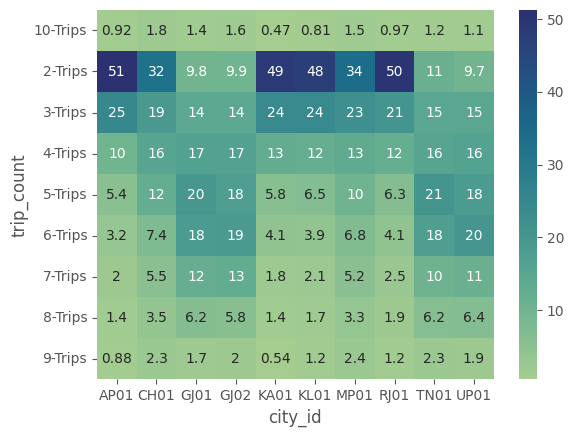

In [230]:
plt.show(sns.heatmap(repeat_dsit_by_city,annot = True, cmap = "crest"))

#### **values in %**

#### *Q7*

#### `targets_db`
----

**city_target_passenger_rating** \
**monthly_target_trips** \
**monthly_target_new_passengers** 

In [231]:
city_pass_rating_t = pd.read_csv(root_path + "city_target_passenger_rating.csv")
monthly_trips_t = pd.read_csv(root_path + "monthly_target_trips.csv")
monthly_new_pass_t = pd.read_csv(root_path + "monthly_target_new_passengers.csv")

In [232]:
trips["date"] = pd.to_datetime(trips["date"])

In [233]:
trips.dtypes

trip_id                           object
date                      datetime64[ns]
city_id                           object
passenger_type                    object
distance_travelled(km)             int64
fare_amount                        int64
passenger_rating                   int64
driver_rating                      int64
dtype: object

### Actual Total trips v/s Target Total trips

In [234]:
trips_by_month = trips.groupby(["city_id",trips["date"].dt.month_name()])[["trip_id"]].count().reset_index()\
.rename(columns={"trip_id" : "total_trips"})
trips_by_month

,city_id,date,total_trips
0,AP01,April,4938
1,AP01,February,4793
2,AP01,January,4468
3,AP01,June,4478
4,AP01,March,4877
5,AP01,May,4812
6,CH01,April,5566
7,CH01,February,7387
8,CH01,January,6810
9,CH01,June,6029


In [235]:
monthly_trips_t["month"] = pd.to_datetime(monthly_trips_t["month"])
monthly_trips_t.dtypes

month                 datetime64[ns]
city_id                       object
total_target_trips             int64
dtype: object

all dates in month are of same column since data is of last 6 months

In [236]:
monthly_trips_t["month_name"] = monthly_trips_t["month"].dt.month_name()

In [237]:
monthly_trips_t

,month,city_id,total_target_trips,month_name
0,2024-03-01,MP01,7000,March
1,2024-05-01,KA01,2500,May
2,2024-04-01,UP01,11000,April
3,2024-02-01,GJ02,6000,February
4,2024-05-01,KL01,9000,May
5,2024-02-01,UP01,13000,February
6,2024-01-01,AP01,4500,January
7,2024-01-01,CH01,7000,January
8,2024-02-01,KL01,7500,February
9,2024-03-01,UP01,13000,March


In [238]:
monthly_trips_a_t = pd.merge(trips_by_month,monthly_trips_t,how="inner",left_on=["city_id","date"],\
                                           right_on = ["city_id","month_name"])

In [239]:
# to create a new column : "diff(%)"
def diff_col(df,actual_col,target_col):
    df["diff(%)"] = (((df[actual_col] -df[target_col])/df[target_col])*100).round(2)

In [240]:
#creates a new colum: "diff(%)" and changes orientation of df.. city along rows and months along cols.
def calculated_df(df:pd.DataFrame,actual_col:str,target_col:str) -> pd.DataFrame :
    diff_col(df,actual_col,target_col)
    if "month_name" not in df.columns: 
        df["month_name"] = df["month"].dt.month_name()
    
    df = pd.pivot(df,index="city_id",columns = "month_name",values="diff(%)")
    return df
    

In [241]:
def custom_heatmap(df_crosstab:pd.DataFrame):
   return plt.show(sns.heatmap(df_crosstab,annot=True,cmap="coolwarm_r",center=0))

In [242]:
monthly_trips_diff = calculated_df(monthly_trips_a_t,"total_trips","total_target_trips")
monthly_trips_diff

month_name,April,February,January,June,March,May
city_id,,,,,,
AP01,-1.24,6.51,-0.71,-10.44,8.38,-3.76
CH01,-7.23,5.53,-2.71,0.48,-6.16,10.33
GJ01,-1.69,0.77,-7.13,-14.56,2.97,-2.26
GJ02,-8.60,-12.87,-20.42,-27.92,-6.70,-10.78
KA01,4.12,33.40,24.25,13.68,31.65,20.28
KL01,8.47,2.51,-2.08,-28.90,26.60,11.27
MP01,-1.13,3.00,-3.76,-16.16,0.27,3.83
RJ01,20.06,22.09,15.20,3.60,2.44,20.79
TN01,4.60,-2.74,4.31,-9.77,5.14,1.43


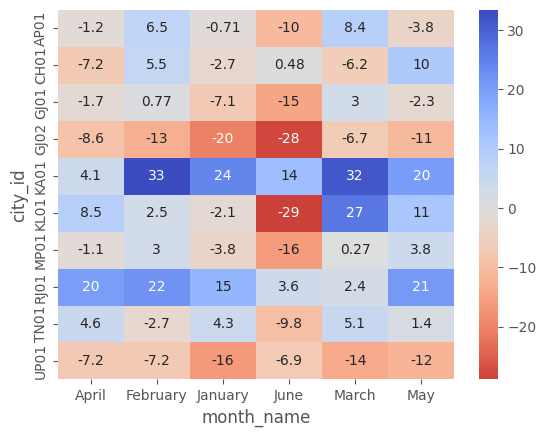

In [243]:
custom_heatmap(monthly_trips_diff)

### Actual New Passenger Count v/s Target New Passenger Count

In [244]:
monthly_new_pass_t

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000
3,2024-05-01,UP01,2000
4,2024-05-01,MP01,2000
5,2024-01-01,AP01,2500
6,2024-03-01,MP01,2700
7,2024-06-01,CH01,3000
8,2024-04-01,AP01,2000
9,2024-01-01,KA01,2000


In [245]:
%who

avg_far_per_trip	 calculated_df	 city	 city_pass_rating_t	 colors	 cols	 custom_heatmap	 date	 diff_col	 
monthly_new_pass_t	 monthly_trips_a_t	 monthly_trips_diff	 monthly_trips_t	 months	 new_pass_diff	 np	 pass_rating_a_t	 passenger_summ	 
pd	 plt	 repeat_dsit_by_city	 repeat_passen_freq	 repeat_trip_dist	 root_path	 rpr_c_m	 sns	 total_trips_per_month	 
trip_count_by_city	 trip_dates	 trips	 trips_by_month	 


In [246]:
passenger_summ

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129
5,2024-01-01,KL01,4865,795,5660
6,2024-01-01,MP01,2843,1033,3876
7,2024-01-01,RJ01,10423,1422,11845
8,2024-01-01,TN01,1822,392,2214
9,2024-01-01,UP01,3465,1431,4896


In [247]:
new_pass_diff = pd.merge(monthly_new_pass_t,passenger_summ,on=["month","city_id"],how="inner")\
[["month","city_id","new_passengers","target_new_passengers"]]

In [248]:
new_pass_diff["month"] = pd.to_datetime(new_pass_diff["month"])
new_pass_diff.dtypes

month                    datetime64[ns]
city_id                          object
new_passengers                    int64
target_new_passengers             int64
dtype: object

In [249]:
new_pass_diff.head(3)

,month,city_id,new_passengers,target_new_passengers
0,2024-05-01,GJ01,1611,1500
1,2024-05-01,GJ02,1388,1500
2,2024-03-01,GJ01,1946,2000


In [250]:
new_pass_diff = calculated_df(new_pass_diff,"new_passengers","target_new_passengers")
new_pass_diff

month_name,April,February,January,June,March,May
city_id,,,,,,
AP01,-7.75,-4.80,0.52,-5.00,-13.20,-3.05
CH01,-16.80,2.60,-2.00,-19.00,-19.30,-9.00
GJ01,22.87,12.70,21.60,2.67,-2.70,7.40
GJ02,9.13,19.22,16.06,-26.40,-2.06,-7.47
KA01,-8.20,5.35,-2.15,-6.30,-0.70,-3.95
KL01,23.48,-12.66,-2.70,-24.72,-2.70,9.22
MP01,17.55,6.59,5.30,1.05,1.56,1.40
RJ01,2.00,-10.09,-13.14,-3.75,-38.19,-11.13
TN01,24.20,9.80,21.47,22.60,2.53,3.90


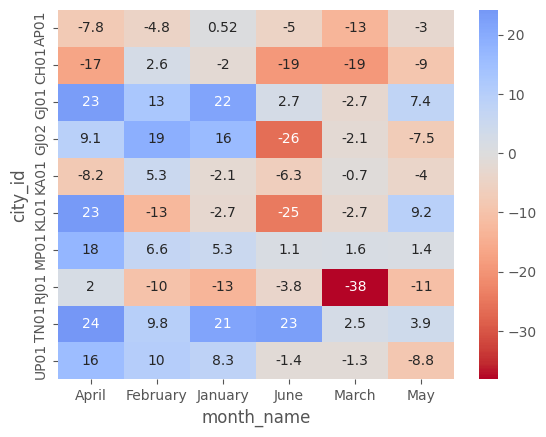

In [251]:
custom_heatmap(new_pass_diff)

### Actual Passenger Rating v/s Target Passenger Rating

In [252]:
city_pass_rating_t

,city_id,target_avg_passenger_rating
0,CH01,8.00
1,UP01,7.25
2,AP01,8.50
3,MP01,8.00
4,RJ01,8.25
5,KA01,8.50
6,GJ01,7.00
7,TN01,8.25
8,KL01,8.50
9,GJ02,7.50


In [253]:
trips

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8
...,...,...,...,...,...,...,...,...
425898,TRPLUC2403180b02b4d0,2024-03-18,UP01,repeated,12,134,5,5
425899,TRPVAD2401032679e669,2024-01-03,GJ02,repeated,12,114,7,5
425900,TRPJAI24022578e10280,2024-02-25,RJ01,repeated,26,479,7,10
425901,TRPJAI240401e297ad20,2024-04-01,RJ01,repeated,27,361,7,10


In [254]:
pass_rating_a_t =trips.groupby("city_id")[["passenger_rating"]].mean().reset_index()\
     .merge(city_pass_rating_t,on="city_id",how="inner")
pass_rating_a_t["passenger_rating"] = pass_rating_a_t["passenger_rating"].round(2)
pass_rating_a_t

,city_id,passenger_rating,target_avg_passenger_rating
0,AP01,8.43,8.50
1,CH01,7.98,8.00
2,GJ01,6.42,7.00
3,GJ02,6.61,7.50
4,KA01,8.70,8.50
5,KL01,8.52,8.50
6,MP01,7.83,8.00
7,RJ01,8.58,8.25
8,TN01,7.88,8.25
9,UP01,6.49,7.25


In [255]:
diff_col(pass_rating_a_t,"passenger_rating","target_avg_passenger_rating")

In [256]:
pass_rating_a_t

,city_id,passenger_rating,target_avg_passenger_rating,diff(%)
0,AP01,8.43,8.50,-0.82
1,CH01,7.98,8.00,-0.25
2,GJ01,6.42,7.00,-8.29
3,GJ02,6.61,7.50,-11.87
4,KA01,8.70,8.50,2.35
5,KL01,8.52,8.50,0.24
6,MP01,7.83,8.00,-2.12
7,RJ01,8.58,8.25,4.00
8,TN01,7.88,8.25,-4.48
9,UP01,6.49,7.25,-10.48


<BarContainer object of 10 artists>

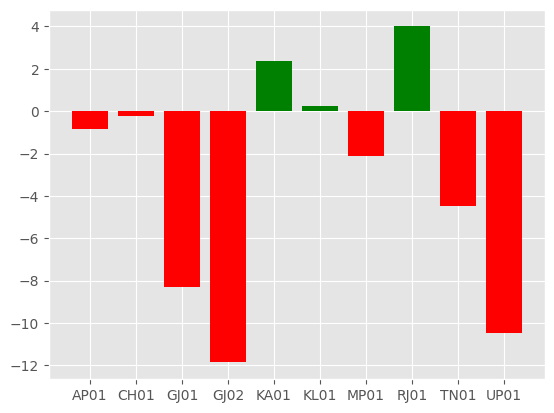

In [257]:
colors = ['green' if value > 0 else 'red' for value in pass_rating_a_t['diff(%)']]
plt.bar(data=pass_rating_a_t,x="city_id",height="diff(%)",color=colors)

#### *Q8*

In [258]:
trips

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8
...,...,...,...,...,...,...,...,...
425898,TRPLUC2403180b02b4d0,2024-03-18,UP01,repeated,12,134,5,5
425899,TRPVAD2401032679e669,2024-01-03,GJ02,repeated,12,114,7,5
425900,TRPJAI24022578e10280,2024-02-25,RJ01,repeated,26,479,7,10
425901,TRPJAI240401e297ad20,2024-04-01,RJ01,repeated,27,361,7,10


In [259]:
trips["passenger_type_num"] = trips["passenger_type"].apply(lambda x : 1 if x== "repeated" else 0)

In [260]:
trips.groupby("city_id").apply(lambda group : (group[["passenger_type_num"]].sum()/len(group))*100,\
                               include_groups=False).rename(columns={"passenger_type_num" : "RPR(%)"})\
                        .sort_values("RPR(%)")

,RPR(%)
city_id,
KA01,28.063801
RJ01,40.360004
KL01,47.899491
CH01,51.494318
AP01,55.062399
TN01,59.656937
MP01,64.991992
GJ02,68.378817
UP01,74.711893


In [261]:
rpr_c_m = trips.groupby(["city_id",trips["date"].dt.month_name()]).apply(lambda group : (group[["passenger_type_num"]].sum()/len(group))*100,\
                               include_groups=False).rename(columns={"passenger_type_num" : "RPR(%)"}).reset_index()\
            .pivot(index="city_id",columns="date")

In [262]:
rpr_c_m

RPR(%)                                                       
date         April   February    January       June      March        May
city_id                                                                  
AP01     62.636695  50.344252  43.755595  57.570344  55.505434  59.704904
CH01     55.156306  44.442940  42.437592  59.694808  50.860100  58.761329
GJ01     81.253179  75.146102  70.902130  81.975655  79.000755  83.517495
GJ02     72.445716  58.951798  56.251309  76.435432  68.506610  76.064839
KA01     29.466001  21.026987  21.247485  34.060521  24.572731  36.115730
KL01     49.405859  43.197190  33.755447  52.945773  48.762507  56.371080
MP01     68.293999  60.083218  57.800208  67.859415  60.934606  73.956594
RJ01     46.344029  32.024950  30.401976  41.322902  44.304273  53.533769
TN01     66.074843  51.615746  50.095864  61.177961  58.206522  70.732394
UP01     77.369761  70.737977  68.088046  80.751953  71.854954  81.195260

In [263]:
rpr_c_m.columns


MultiIndex([('RPR(%)',    'April'),
            ('RPR(%)', 'February'),
            ('RPR(%)',  'January'),
            ('RPR(%)',     'June'),
            ('RPR(%)',    'March'),
            ('RPR(%)',      'May')],
           names=[None, 'date'])

In [264]:
cols = []
months = ["January" ,"February" ,"March" ,"April" ,"May" ,"June"]
[cols.append(("RPR(%)",month)) for month in months]
cols

[('RPR(%)', 'January'),
 ('RPR(%)', 'February'),
 ('RPR(%)', 'March'),
 ('RPR(%)', 'April'),
 ('RPR(%)', 'May'),
 ('RPR(%)', 'June')]

In [265]:
rpr_c_m = rpr_c_m[cols]
rpr_c_m

RPR(%)                                                       
date       January   February      March      April        May       June
city_id                                                                  
AP01     43.755595  50.344252  55.505434  62.636695  59.704904  57.570344
CH01     42.437592  44.442940  50.860100  55.156306  58.761329  59.694808
GJ01     70.902130  75.146102  79.000755  81.253179  83.517495  81.975655
GJ02     56.251309  58.951798  68.506610  72.445716  76.064839  76.435432
KA01     21.247485  21.026987  24.572731  29.466001  36.115730  34.060521
KL01     33.755447  43.197190  48.762507  49.405859  56.371080  52.945773
MP01     57.800208  60.083218  60.934606  68.293999  73.956594  67.859415
RJ01     30.401976  32.024950  44.304273  46.344029  53.533769  41.322902
TN01     50.095864  51.615746  58.206522  66.074843  70.732394  61.177961
UP01     68.088046  70.737977  71.854954  77.369761  81.195260  80.751953

rpr increases from jan to may and decreses in june

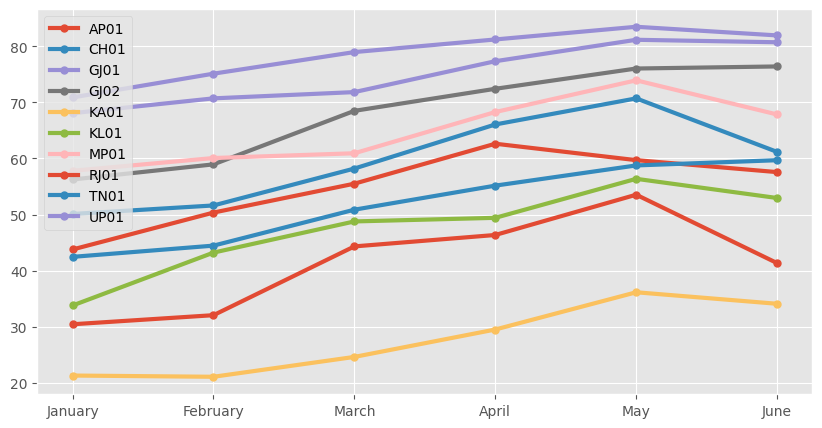

In [266]:
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
for city in rpr_c_m.index:
    plt.plot(months,rpr_c_m.loc[city],lw=3,marker="o",ms=5)
plt.legend(rpr_c_m.index).set_loc("upper left")

#plt.style.available

### `CONCLUSIONS`
1. **Trip Distribution by City**:
   - Jaipur (RJ01) has the highest number of trips, followed by Surat (GJ01) and Lucknow (UP01).
   - Mysore (KA01) has the lowest number of trips.

2. **Average Distance and Fare per Trip**:
   - Jaipur (RJ01) has the highest average distance per trip, indicating longer travel distances.
   - Jaipur (RJ01) also has the highest average fare per trip, which aligns with the longer distances.
   - Surat (GJ01) has the lowest average distance and fare per trip.

3. **Passenger Ratings**:
   - New passengers generally give higher ratings compared to repeated passengers.
   - Kochi (KL01) and Jaipur (RJ01) have the highest passenger ratings for new passengers.
   - Chandigarh (CH01) and Indore (MP01) have the lowest passenger ratings for new passengers.

4. **Trip Distribution by Day Type**:
   - Weekend trips are more prevalent in cities like Mysuru (KA01) and Jaipur (RJ01).
   - Weekday trips are more common in cities like Lucknow (UP01) and Vadodora (GJ02).

5. **Repeat Trip Distribution**:
   - Cities like Surat (GJ01) and Vadodara (GJ02) have a higher frequency of repeat trips, indicating a loyal customer base.
   - Cities like Mysore (KA01) have a lower frequency of repeat trips.

6. **Actual vs. Target Trips**:
   - Cities like Jaipur (RJ01) and Lucknow (UP01) consistently meet or exceed their target trips.
   - Cities like Vadodara (GJ02) and Mysore (KA01) often fall short of their target trips.

7. **Actual vs. Target New Passengers**:
   - Cities like Jaipur (RJ01) and Lucknow (UP01) generally meet or exceed their target for new passengers.
   - Cities like Chandigarh (CH01) and Mysore (KA01) often fall short of their target for new passengers.

8. **Actual vs. Target Passenger Ratings**:
   - Cities like Jaipur (RJ01) and Kochi (KL01) have passenger ratings that meet or exceed their targets.
   - Cities like Surat (GJ01) and Vadodara (GJ02) have passenger ratings below their targets.

9. **Repeat Passenger Ratio (RPR)**:
   - Surat (GJ01) and Vadodara (GJ02) have the highest repeat passenger ratio, indicating a strong loyal customer base.
   - Mysore (KA01) has the lowest repeat passenger ratio, indicating a need for customer retention strategies.



### `RECOMMENDATIONS`

1. **Focus on High-Performing Cities**:
   - Continue to invest in cities like Jaipur (RJ01) and Lucknow (UP01) as they consistently meet or exceed targets for trips and new passengers.
   - Consider expanding services or introducing new features in these cities to maintain growth.

2. **Improve Performance in Low-Performing Cities**:
   - Implement targeted marketing campaigns in cities like Vadodara (GJ02) and Mysore (KA01) to increase trip numbers and new passenger acquisitions.
   - Offer promotions or discounts to attract new passengers and retain existing ones.

3. **Enhance Customer Loyalty**:
   - Introduce loyalty programs or rewards for repeat passengers, especially in cities with a high repeat passenger ratio like Surat (GJ01) and Vadodara (GJ02).
   - Provide personalized offers or discounts to encourage repeat trips.

4. **Improve Passenger Ratings**:
   - Address issues in cities with lower passenger ratings, such as Surat (GJ01) and Vadodara (GJ02), by improving service quality, driver training, and vehicle maintenance.
   - Encourage passengers to provide feedback and act on it to enhance their experience.

5. **Optimize Weekend Services**:
   - Increase the availability of cabs during weekends in cities with high weekend trip demand, such as Kochi (KL01) and Jaipur (RJ01).
   - Offer weekend-specific promotions to attract more passengers.


